# In Dimensionality Reduction Part


## 1) Implement PCA

## 2) Implement LDA

==================================================================================================

### Importing Moduels

In [5]:
import numpy as np
from numpy import linalg
from sklearn import decomposition    # sklearn.version 0.19

from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA 

import matplotlib.pyplot as plt
%matplotlib inline

### Importing Dataset

In [ ]:
data=datasets.load_iris()
X=data['data']
Y=data['target']

### Assignments 1 : PCA

    - Compare PCA-Module and self caculation

- Self Caculation

In [ ]:
# substract mean
X_mean=np.mean(X,axis=0)
normal_X=X-X_mean

# calculate the covariance matrix
cor_matrix=np.cov(normal_X.T)

# Calculate the eigenvectors and eigenvalues of the covariance matrix
eigenvalue,eigenvector=linalg.eig(cor_matrix)

# 두 주성분
p1=np.sum(eigenvector[:,0]*normal_X,axis=1) # eigenvalue가 가장 클 때의 eigenvector
p2=np.sum(eigenvector[:,1]*normal_X,axis=1) # eigenvalue가 두 번째로 클 때의 eigenvector


- Use PCA Module

In [ ]:
pca=decomposition.PCA(n_components=4)
pca.fit(X)
x_pca=pca.transform(X)

- Compare Results

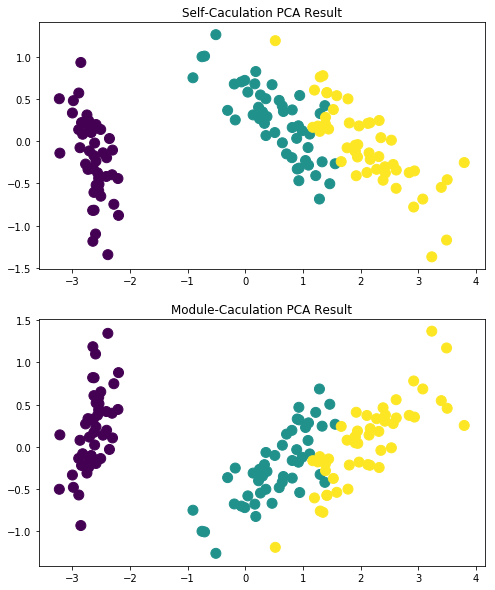

In [22]:
fig = plt.figure(1, figsize=(8,10))

plt.subplot(211)
plt.scatter(p1,p2,s=100,c=Y)
plt.title("Self-Caculation PCA Result")

plt.subplot(212)
plt.scatter(x_pca[:,0],x_pca[:,1],s=100,c=Y)
plt.title("Module-Caculation PCA Result")

plt.show()

### Assignments2 : LDA
    - Compare Module and self caculation

- Self Caculation

In [23]:
# calculate the SW
Sw=np.zeros((len(X[0]),len(X[0])))
for C in set(Y):
    n=len(X[Y==C])
    partial_X_mean=np.mean(X[Y==C],axis=0)
    norm_X=X[Y==C]-partial_X_mean
    cor_matrix=np.cov(norm_X.T)*(n-1)
    Sw+=cor_matrix

# calculate the SB
Sb = np.zeros((len(X[0]),len(X[0])))   
mean_vectors=[]
for C in set(Y):
    mean_vectors.append(np.mean(X[Y==C],axis=0))
re_X_mean = X_mean.reshape(len(X[0]),1)
for i, mean_vec in enumerate(mean_vectors):  
    n = X[Y==i,:].shape[0]
    mean_vec = mean_vec.reshape(len(X[0]),1) 
    Sb += n*(mean_vec - re_X_mean).dot((mean_vec - re_X_mean).T)
    
# Calculate the eigenvectors and eigenvalues
eigenvalue2, eigenvector2 = np.linalg.eig(np.linalg.inv(Sw).dot(Sb))

W = np.hstack((eigenvector2[:,0].reshape(4,1), eigenvector2[:,1].reshape(4,1))) #eigenvalue2가 가장 큰 2개의 eigenvector2

#transforming
lda_x=normal_X.dot(W)

- Use LDA module for Caculation

In [24]:
lda=LDA(store_covariance=True,n_components=2)
lda.fit(X,Y)
x_lda=lda.transform(X)

- Compare Results

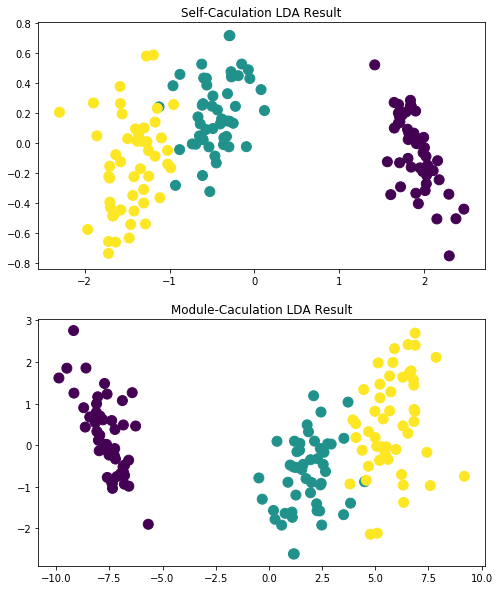

In [25]:
fig = plt.figure(1, figsize=(8,10))

plt.subplot(211)
plt.scatter(lda_x[:,0],lda_x[:,1],s=100,c=Y)
plt.title("Self-Caculation LDA Result")

plt.subplot(212)
plt.scatter(x_lda[:,0],x_lda[:,1],s=100,c=Y)
plt.title("Module-Caculation LDA Result")

plt.show()